In [12]:
#!pip install textblob

In [14]:
#!pip install vaderSentiment

# Import libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load data

In [3]:
spotify = pd.read_csv("spotify.csv")
spotify

,Title,Artist,Year,Genre,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,Sunrise,Norah Jones,2004,Pop,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,2000,Rock,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,2001,Hip Hop,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,2007,Metal,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,2002,Rock,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,Heartbreak Hotel,Elvis Presley,1958,Pop,94,21,70,-12,11,72,128,84,7,63
1990,Hound Dog,Elvis Presley,1958,Pop,175,76,36,-8,76,95,136,73,6,69
1991,Johnny B. Goode,Chuck Berry,1959,Rock,168,80,53,-9,31,97,162,74,7,74
1992,Take Five,The Dave Brubeck Quartet,1959,Jazz,174,26,45,-13,7,60,324,54,4,65


In [5]:
spotify.shape

(1994, 14)

# Steps for Sentiment Analysis Using Song Titles
# Preprocess Titles:

## - Clean and tokenize the text.

In [8]:
def preprocess_title(title):
    # Convert to lowercase
    title = title.lower()
    # Remove punctuation and special characters
    title = re.sub(r'[^a-zA-Z\s]', '', title)
    # Optional: Tokenize into words
    tokens = title.split()  # Split the title into a list of words
    return ' '.join(tokens)  # Rejoin tokens if needed for sentiment tools

In [9]:
spotify['Cleaned_Title'] = spotify['Title'].apply(preprocess_title)
spotify['Cleaned_Title']

0                     sunrise
1                 black night
2              clint eastwood
3               the pretender
4       waitin on a sunny day
                ...          
1989         heartbreak hotel
1990                hound dog
1991           johnny b goode
1992                take five
1993           blueberry hill
Name: Cleaned_Title, Length: 1994, dtype: object

# Perform Sentiment Analysis with TextBlob
- TextBlob provides polarity scores (-1 to 1) and subjectivity scores (0 to 1). 
- Polarity reflects sentiment, while subjectivity measures how opinionated the text is.

In [16]:
def analyze_sentiment_textblob(title):
    blob = TextBlob(title)
    return blob.sentiment.polarity

In [17]:
spotify['Sentiment_TextBlob'] = spotify['Cleaned_Title'].apply(analyze_sentiment_textblob)
spotify['Sentiment_TextBlob']

0       0.000000
1      -0.166667
2       0.000000
3       0.000000
4       0.000000
          ...   
1989    0.000000
1990    0.000000
1991    0.000000
1992    0.000000
1993    0.000000
Name: Sentiment_TextBlob, Length: 1994, dtype: float64

# Perform Sentiment Analysis with VADER
- VADER provides a compound score that reflects overall sentiment.

In [19]:
analyzer = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment
def analyze_sentiment_vader(title):
    scores = analyzer.polarity_scores(title)
    return scores['compound']  # Use the compound score for overall sentiment

In [20]:
spotify['Sentiment_VADER'] = spotify['Cleaned_Title'].apply(analyze_sentiment_vader)
spotify['Sentiment_VADER']

0       0.0000
1       0.0000
2       0.0000
3       0.0000
4       0.4215
         ...  
1989   -0.5719
1990    0.0000
1991    0.0000
1992    0.0000
1993    0.0000
Name: Sentiment_VADER, Length: 1994, dtype: float64

# Categorize Sentiment
- Categorize the sentiment scores into positive, neutral, and negative.

In [21]:
def categorize_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

In [22]:
spotify['Sentiment_Category'] = spotify['Sentiment_VADER'].apply(categorize_sentiment)
spotify['Sentiment_Category']

0        Neutral
1        Neutral
2        Neutral
3        Neutral
4       Positive
          ...   
1989    Negative
1990     Neutral
1991     Neutral
1992     Neutral
1993     Neutral
Name: Sentiment_Category, Length: 1994, dtype: object

# Visualization

## 1. Bar Plot of Sentiment Categories

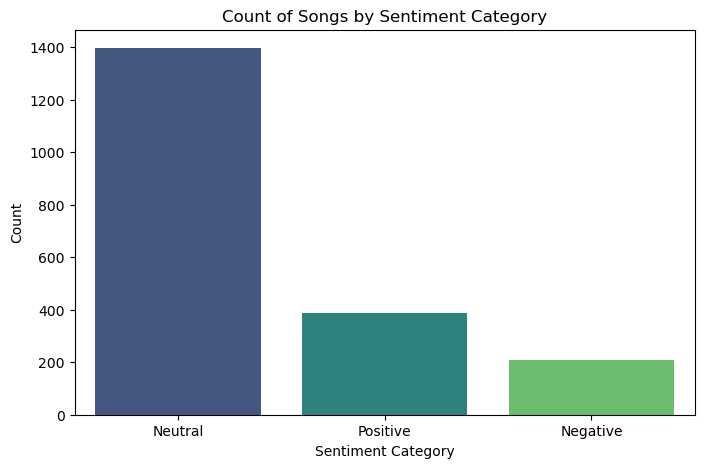

In [24]:
# Bar plot for sentiment categories
plt.figure(figsize=(8, 5))
sns.countplot(data=spotify, x='Sentiment_Category', palette='viridis')
plt.title('Count of Songs by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

## 2. Distribution of Sentiment Scores

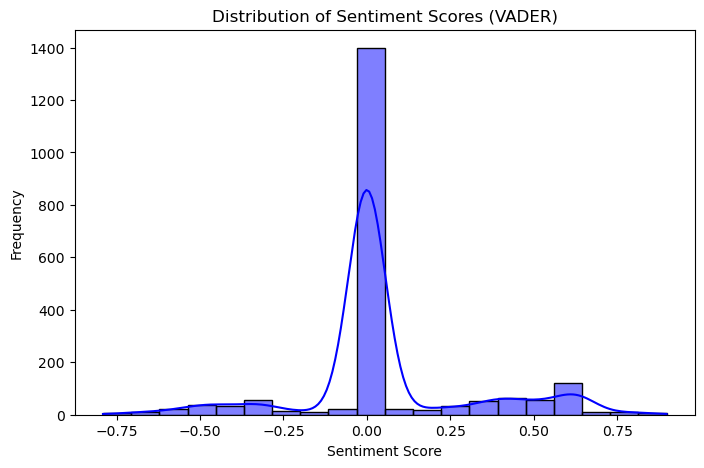

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(spotify['Sentiment_VADER'], bins=20, kde=True, color='blue')
plt.title('Distribution of Sentiment Scores (VADER)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

## 3. Box Plot of Sentiment Scores by Category

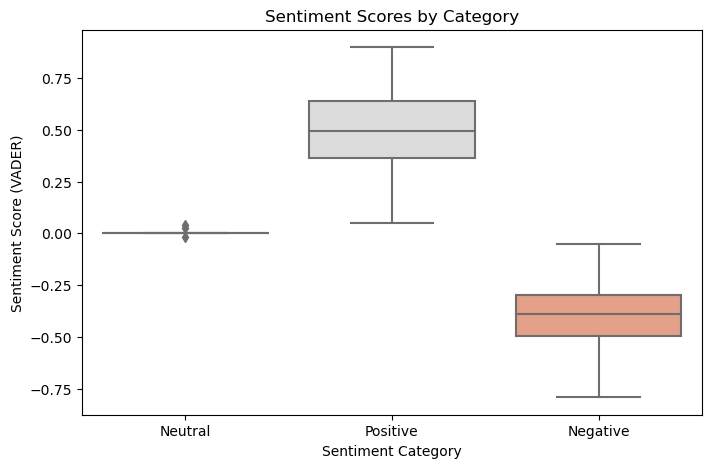

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=spotify, x='Sentiment_Category', y='Sentiment_VADER', palette='coolwarm')
plt.title('Sentiment Scores by Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Sentiment Score (VADER)')
plt.show()

## 4. Pie Chart of Sentiment Categories

In [28]:
category_counts = spotify['Sentiment_Category'].value_counts()

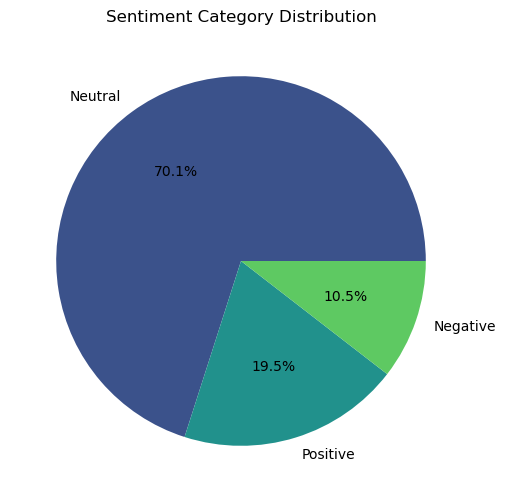

In [29]:
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(category_counts)))
plt.title('Sentiment Category Distribution')
plt.show()

## 5. Scatter Plot: Sentiment vs. Popularity

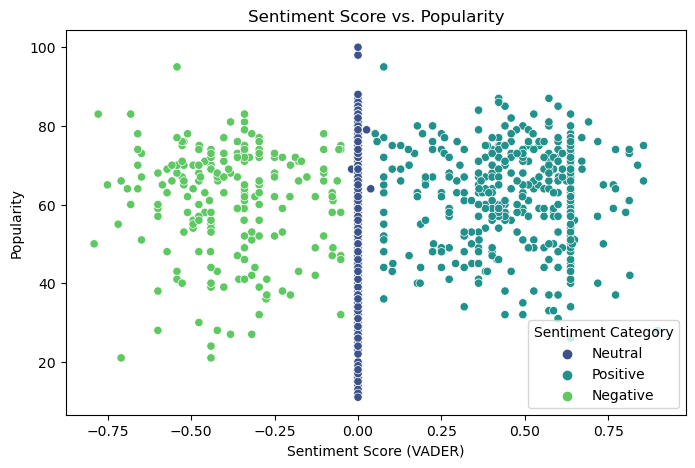

In [30]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=spotify, x='Sentiment_VADER', y='Popularity', hue='Sentiment_Category', palette='viridis')
plt.title('Sentiment Score vs. Popularity')
plt.xlabel('Sentiment Score (VADER)')
plt.ylabel('Popularity')
plt.legend(title='Sentiment Category')
plt.show()